## Sustitución por muestras aleatorias

Los métodos de imputación consisten en estimar los valores faltantes en base a los valores existentes dela variable. El objetivo de cualquier método de imputación es producir un **conjunto completo** de datos que pueda ser utilizado por un algoritmo de aprendizaje de máquina. 

La sustitución por muestras aleatorias en principio es similar a la sustitución busca preservar los parámetros estadísticos de la variable original que presenta datos ausentes.

Como su nombre lo indica, muestreo aleatorio consiste en tomar observaciones de una variable de forma aleatoria, y usarlas para sustituir los valores nulos en la misma variable. En la sustitución por muestras aleatorias, se extraen tantos valores aleatorias como observaciones nulas haya en la variable.

Con el muestreo aleatorio sobre variables numéricas, garantizamos que la media y la desviación estándar de la variable se preserven.

Con el muestreo aleatorio sobre variables categóricas, garantizamos que la frecuencia de las diferentes categorías se preserven.

### Cuáles variables se pueden sustituir por muestras aleatorias?

La sustitución aleatoria se puede aplicar en variables numéricas y categóricas.

### Supuestos

La sustitución por muestras aleatorias asume que los datos faltan completamente al azar (MCAR). Si este es el caso, tiene sentido que reemplacemos los datos ausentes por valores extraídos de la distribución original de la variable

Desde el punto de vista probabilístico, los valores que son más frecuentes, como la media o la mediana o la categoría más frecuente serán seleccionados más frecuentemente – ya que en proporción, hay más de ellos - pero otros valores menos frecuentes serán también extraídos al azar. Por lo tanto las distribuciones de las variables se preservan.

La idea es reemplazar una población de datos nulos por una población de valores existentes, que muestre la misma distribución de la variable original.

### Ventajas

- Fácil de implementar
- Forma rápida de obtener conjuntos completos de datos
- Preserva la varianza de la variable 

### Limitaciones

- Aleatoriedad
- Distorsión de la relación entre la variables sustituida y el resto de las variables si el número de datos ausentes es alto
- Consume bastante memoria para modelos en producción, ya que necesita guardar los datos originales usados para entrenar el modelo para así poder extraer los valores que se van a usar para reemplazar los valores nulos.


### Cuándo puedo usar la sustitución por muestra aleatoria?

- Cuando los datos están ausentes completamente al azar
- No más del 5% de la variable está ausente 
- Es apropiado cuando se quiere usar modelos lineales ya que no distorsiona la distribución de la variable, independientemente del número de valores nulos

Si se usa en combinación con un Indicador de Ausencia, como veremos en la próxima lección, este método también puede usarse con datos que no estén ausentes de forma aleatoria o cuando el  % de observaciones ausentes es mayor.


#### Aleatoriedad

La aleatoriedad puede no ser grave cuando reemplazamos valores ausentes en datos para competiciones de ciencia de datos, donde todo el conjunto de datos ausentes es reemplazado una vez, los datos se usan para hacer las predicciones y el problema finaliza. Sin embargo, en organizaciones que necesitan utilizar el modelo para derivar soluciones, la situación es  diferente.

Imagina, por ejemplo una fábrica de autos intentando predecir cuanto tiempo un carro estará en la fábrica antes de pasar todas las pruebas de seguridad. Hoy, reciben un carro con datos ausentes en alguna de las variables, corren un modelo de machine learning para predecir cuanto tiempo el carro tardará antes de pasar todas las pruebas de seguridad, reemplazan los valores ausentes con una muestra aleatoria y producen una estimación de cuánto tiempo va a tardar. Mañana, cuando usan el mismo modelo para el mismo carro, el modelo va a tomar otra muestra aleatoria para sustituir los valores ausentes, que puede que sean o no lo mismos que se seleccionaron hoy, y por lo tanto, la estimación final del tiempo que tardará en pasar las pruebas de seguridad puede que no sea igual al obtenido el día anterior.

Adicionalmente, imagina que la fábrica de autos evaluá dos autos diferentes que tienen los mismos valores para todas las variables y valores ausentes para el mismo subconjunto de variables. Corren el modelo de machine learning para cada carro y ya que los datos ausentes son sustituidos con valores tomados aleatoriamente, los dos autos, que son exactamente iguales, pueden terminar con diferentes estimados de tiempos de espera para pasar las pruebas.

Esto puede no parecer importante o de hecho trivial, sin embargo las empresas deben adherirse a ciertas regulaciones, que incluyen dar el mismo tratamiento en situaciones similares. De este modo, si por ejemplo, en lugar de autos, estamos hablando de personas aplicando para un préstamo, o personas buscando un tratamiento médico, el modelo de machine learning podría retornar predicciones diferentes soluciones para candidatos que están bajo las mismas condiciones. Y esto no es ni justo ni aceptable. Este comportamiento, por lo tanto, necesita ser evitado.

#### Entonces, debemos reemplazar los valores ausentes con muestras aleatorias o no?

Es posible reemplazar los datos ausentes con una muestra aleatoria, pero es necesario controlar la aleatoriedad, así individuos en la misma situación reciben predicciones similares, y por lo tanto se les ofrece la misma solución. 
Y cómo podemos estar seguros de que este es el caso? Pues fijando las semillas durante los procesos de extracción aleatoria de valores.

Otra cosa a tener en cuenta con la sustitución aleatoria, es que, al igual que cuando se hacen sustituciones por la media o mediana,  la covarianza y correlaciones con las otras variables del set de datos pueden ser modificados, particularmente, si hay un alto porcentaje de valores nulos.


### Nota Final

El reemplazo de valores ausentes por una muestra aleatoria, aunque es similar en concepto al reemplazo por la media o la mediana, no es tan popular en las competencias de ciencia de datos como estos métodos. Probablemente, por el elemento de aleatoriedad o porque el código para implementarlo no es tan sencillo.

Sin embargo, es un método válido, con claras ventajas sobre la sustitución por la media/ mediana ya que preserva la distribución de las variables. Y si eres cuidadoso con la aleatoriedad, este puede ser un buen método para elegir, particularmente para modelos lineales.

## En este demo:

Usaremos ambos conjuntos de datos: House Price y Titanic y pandas para hacer la sustitución por muestra aleatoria.

- Para bajar los datos, por favor referirse a la clase en **Datasets** en la  **Sección 1** del curso.


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# separar los datasets
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

## Muestra aleatoria para variables numéricas


In [2]:
# carguemos los datos con 3 columnas seleccionadas

data = pd.read_csv('../titanic.csv', usecols=['age', 'fare', 'survived'])

data.head()

,survived,age,fare
0,1,29.0000,211.3375
1,1,0.9167,151.5500
2,0,2.0000,151.5500
3,0,30.0000,151.5500
4,0,25.0000,151.5500


In [3]:
# evaluemos el porcentaje de valores nulos

data.isnull().mean()

survived    0.000000
age         0.200917
fare        0.000764
dtype: float64

### Importante

Los valores para sustituir datos nulos deben ser extraídos del set de entrenamiento solamente. De modo que debemos separar el set de datos original en set de entrenamiento y prueba.

In [4]:
# separar datos en sets entrenamiento y prueba

X_train, X_test, y_train, y_test = train_test_split(
    data,
    data.survived, # target
    test_size=0.3, # porcentaje de obsen test set
    random_state=0) # semilla

X_train.shape, X_test.shape

((916, 3), (393, 3))

In [5]:
# sustituyamos age usando una muestra aleatoria 
# para ambos sets, el de entrenamiento y prueba

# creemos las nuevas variables donde los valores nulos van a ser sustituidos
# haz una copia de la variable original, con valores nulos

X_train['age_imputed'] = X_train['age'].copy()
X_test['age_imputed'] = X_test['age'].copy()

# extraer la muestra aleatoria para sustituir los valores nulos
# recuerda que se hace en el set de entrenamiento
# y luego usamos estos valores para sustituir en ambos
# sets de entrenamiento y prueba


random_sample_train = X_train['age'].dropna().sample(
    X_train['age'].isnull().sum(), random_state=0)

random_sample_test = X_train['age'].dropna().sample(
    X_test['age'].isnull().sum(), random_state=0)

# Veamos en más detalle lo que está sucediendo:

# 1) dropna() remueve los valores nulos NA de la variable original,
# esto significa que vamos a extraer aleatoriamente valores existentes

# 2) sample() es el método para calcular la muestra aleatoria

# 3) X_train['age'].isnull().sum() es el número de valores aleatorios a extraer
# queremos extraer tantos valores al azar como valores nulos hayan en la variable original

# 4) random_state fija la semilla para poder reproducir los resultados,
# de manera que se puedan extraer siempre los mismos valores, cada vez que corramos el notebook

# pandas necesita tener el mismo índice para poder unir los datos
random_sample_train.index = X_train[X_train['age'].isnull()].index
random_sample_test.index = X_test[X_test['age'].isnull()].index

# reemplazar los datos nulos en la variable nueva
X_train.loc[X_train['age'].isnull(), 'age_imputed'] = random_sample_train
X_test.loc[X_test['age'].isnull(), 'age_imputed'] = random_sample_test

In [6]:
# revisemos que los valores nulos fueron sustituidos
X_train['age_imputed'].isnull().sum()

0

In [7]:
# revisemos que los valores nulos fueron sustituidos
X_test['age_imputed'].isnull().sum()

0

In [8]:
X_train.head(15)

,survived,age,fare,age_imputed
501,1,13.0,19.5000,13.0
588,1,4.0,23.0000,4.0
402,1,30.0,13.8583,30.0
1193,0,NaN,7.7250,40.5
686,1,22.0,7.7250,22.0
971,0,NaN,7.8792,39.0
117,1,30.0,56.9292,30.0
540,1,2.0,26.0000,2.0
294,0,49.0,110.8833,49.0
261,1,35.0,26.2875,35.0


Podemos ver como los valores nulos fueron reemplazados por diferentes valores en las diferentes filas u observaciones!. Esto es lo que queríamos.

#### La muestra aleatoria preserva la distribución original de las variables


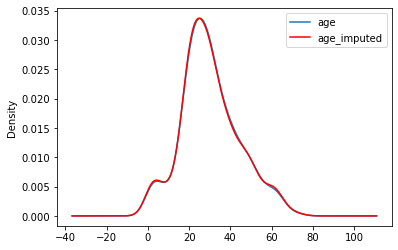

In [9]:
# podemos ver que la distribución de la variable luego de 
# la sustitución es casi igual que la original

fig = plt.figure()
ax = fig.add_subplot(111)

X_train['age'].plot(kind='kde', ax=ax)
X_train['age_imputed'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

Podemos ver que reemplazando los valores faltantes con una muestra aleatoria del set de entrenamiento se preserva la distribución original de la variable.

Si recuerdas de los notebooks anteriores, las otras técnicas de imputación alteraron la distribución de age, porque el porcentaje de NA en age es bastante alto,  ~20%. Sin embargo, la sustitución por muestra aleatoria preserva la distribución original, hasta en esos casos. Por lo tanto esta técnica es bastante útil, si estamos construyendo modelos lineales y no queremos distorsionar la distribución normal de las variables.


In [10]:
# hay cambios en la varianza de la variable.
# sin embargo, este cambio es mucho más pequeño 
# comparado con la sustitución por la media / mediana 
# (revisa los notebooks anteriores para comparar)

print('Varianza variable original: ', X_train['age'].var())
print('Varianza despues de la sustitición aleatoria: ', X_train['age_imputed'].var())

Varianza variable original:  194.16304666581854
Varianza despues de la sustitición aleatoria:  198.53703762759602


In [11]:
# La covarianza de edad con fare son menos afectadas por la técnica de imputación
# comparada con la suputación por la media o mediana

X_train[['fare', 'age', 'age_imputed']].cov()

,fare,age,age_imputed
fare,2248.326729,136.176223,100.938070
age,136.176223,194.163047,194.163047
age_imputed,100.938070,194.163047,198.537038


<AxesSubplot:>

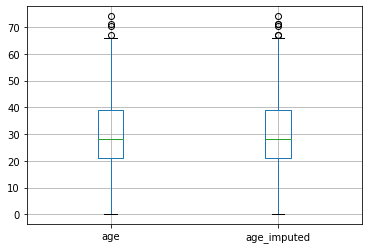

In [12]:
# Finalmente, los outliers (valores extremos) están menos afectados por esta técnica

# Corroboremos usando un gráfico de caja 
X_train[['age', 'age_imputed']].boxplot()

La sustitución por muestra aleatoria ofrece todas las ventajas que trae preservar la distribución original. Y eso es algo positivo, particularmente, si estamos interesados en la distribución de la variable y en la presencia de valores extremos.

Esto es particularmente relevante para los modelos lineales pero no tan importante para los modelos basados en árboles de decisión.


## Aleatoriedad puede llevar a diferentes predicciones para la misma observación

Examinemos el efecto de aleatoriedad en múltiples predicciones sobre la misma observacion, y cómo podemos mitigar este comportamiento, ya que es muy importante cuando ponemos nuestros modelos en producción.


In [13]:
# seleccionemos una observación con NA en age
# en este caso seleccionamos la observación con índice 15

observation = data[data.age.isnull()].head(1)
observation

,survived,age,fare
15,0,NaN,25.925


In [14]:
# y ahora llenamos los NA con un valor aleatorio extraido de la misma
# variable donde las observaciones están disponibles

# extraer un valor eleatorio, solo 1
sampled_value = X_train['age'].dropna().sample(1)

# re indexar a 15
sampled_value.index = [15]  # pandas necesita el mismo índice para hacer la unión

# reemplazar el NA con el valor de la muestra
observation['age_random'] = sampled_value

observation

,survived,age,fare,age_random
15,0,NaN,25.925,25.0


In [15]:
# repitamos el ejercicio nuevamente: 
# llenamos los NA con otro valor aleatorio 

# extraer valor aleatorio, solo 1
sampled_value = X_train['age'].dropna().sample(1)

# re indexar a 15
sampled_value.index = [15]   #pandas necesita el mismo índice para hacer la unión

# reemplazar el NA con el valor de la muestra
observation['age_random'] = sampled_value

observation

,survived,age,fare,age_random
15,0,NaN,25.925,12.0


In [16]:
# y nuevamente
# llenamos los NA con otro valor aleatorio 

# extraer valor aleatorio, solo 1
sampled_value = X_train['age'].dropna().sample(1)

# re indexar a 15
sampled_value.index = [15]  #pandas necesita el mismo índice para hacer la unión

# reemplazar el NA con el valor de la muestra
observation['age_random'] = sampled_value

observation

,survived,age,fare,age_random
15,0,NaN,25.925,2.0


Podemos ver que cada vez que repetimos esta operación, obtenemos diferentes valores para reemplazar en la misma observación. De hecho, si repetimos este proceso 1000 veces:

Text(0, 0.5, 'Número de veces')

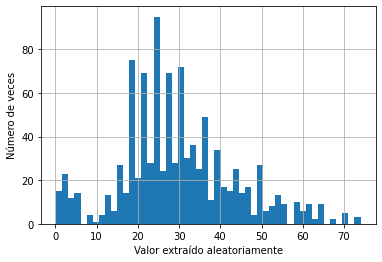

In [17]:
# si repetimos este proceso 1000 veces:

values_ls = []

# capturamos los valores existentes para faciliar el cómputo
tmp = X_train.age.dropna()

for i in range(1000):
    
    # extraer valor aleatorio, solo 1
    sampled_value = tmp.sample(1).values
    
    # anadir el valor extraído a la lista
    values_ls.append(float(sampled_value))
    
pd.Series(values_ls).hist(bins=50)
plt.xlabel('Valor extraído aleatoriamente')
plt.ylabel('Número de veces')

Obtenemos valores muy diferentes para la misma observación. Observa como la distribución de los valores extraídos es similar a la distribución de la variable age.

Si estos fueran pacientes buscando un tratamiento médico, cada vez que corremos un modelo predictivo con los valores extraídos aleatoriamente, asignaríamos a los pacientes con mismas características, diferentes tratamiento, y esto no está bien.

### Cómo podemos cambiar este comportamiento?

Podemos mejorar este comportamiento asignado una semilla:

In [18]:
values_ls = []

for i in range(100):

    # extraer valor aleatorio, solo 1, ahora con la semilla
    sampled_value = X_train.age.dropna().sample(1, random_state=10)

    # añadir valor aleatorio a la lista
    values_ls.append(float(sampled_value))

# imprimir los valores
pd.Series(values_ls).unique()

array([23.5])

In [19]:
values_ls

[23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5]

Ahora que la semilla esta fija, los valores aleatorios extraídos para cada observación son los mismos!!!

Si fijamos la misma semilla para cada observación, lo que pasaría es que por cada diferente observación, podríamos estar sustituyendo los valores nulos con el mismo valor (misma semilla == mismo valor aleatorio extraído). Esto sería lo equivalente a la sustitución por valor arbitrario!!!!

No queremos ese comportamiento tampoco.

Por lo tanto, queremos que nuestra semilla cambie de observación en observación, pero de una forma controlada, así dos observaciones que sean iguales, seran imputadas con el mismo valor aleatorio, mientras que dos observaciones diferentes, seran imputadas con diferentes valores aleatorios.

### Controlando la aleatoriedad con la semilla

Podemos atribuir diferentes semillas a cada observación, de hecho, podemos hacer que esta semilla dependa de una variable alternativa de la misma observación.

Si tomamos el conjunto de datos del Titanic, si dos pasajeros pagaron exactamente la misma tarifa 'fare', deberían tener la misma probabilidad de supervivencia (cuando la edad 'age' es ausente).
Implementemos esto en código:

In [20]:
# seleccionemos una observación con NA en 'age'
# en este caso tomamos la observación con índice 15

observation = data[data.age.isnull()].head(1)
observation

,survived,age,fare
15,0,NaN,25.925


In [21]:
# la semilla es ahora el valor en la variable 'fare'

int(observation.fare)

25

In [22]:
# asignamos el valor de 'fare' como la semilla en la extracción 
# de la muestra aleatoria

sampled_value = X_train.age.dropna().sample(1,
                                            random_state=int(observation.fare))
sampled_value.index = [15]

observation['age_random'] = sampled_value
observation

,survived,age,fare,age_random
15,0,NaN,25.925,44.0


In [23]:
# para una observación con un valor diferente en 'fare',
# obtendríamos una muestra aleatoria diferente 

observation = data[data.age.isnull()].tail(1)
observation

,survived,age,fare
1305,0,NaN,14.4542


In [24]:
# nueva semilla
int(observation.fare)

14

In [25]:
# asignamos el valor de 'fare' como la semilla en el proceso de extracción del valor elatorio
sampled_value = X_train.age.dropna().sample(1,
                                            random_state=int(observation.fare))
sampled_value.index = [1305]

observation['age_random'] = sampled_value
observation

,survived,age,fare,age_random
1305,0,NaN,14.4542,40.0


Esta es una forma de controlar la aleatoriedad. Usando el valor de 'fare' para fijar el 'random_state' en la función, podemos garantizar que pasajeros que pagaron el mismo 'fare', tendrán el valor de 'age' sustituido con el mismo número y por lo tanto los dos pasajeros tendrán la misma probabilidad de supervivencia.

### Nota!!

En la vida real, construirás modelos que usan decenas de variables o más. En casos como ese, puedes seleccionar las 3-5 variables más importantes, aquellas que tiene el impacto más fuerte en los resultados del modelo de machine learning y combinarlos para create el 'random_state' o estado aleatorio. Por lo tanto clientes que compartan los mismos valores de las 3-5 variables principales, tendrán resultados o probabilidades similares.

## Muestras aleatorias para Variables Categóricas

Repitamos el ejercicio pero ahora para variables categóricas.

In [26]:
# carguemos los datos con unas pocas columnas para el demo
cols_to_use = ['BsmtQual', 'FireplaceQu', 'SalePrice']

data = pd.read_csv('../houseprice.csv', usecols=cols_to_use)

# inspeccionemos el porcentaje de valores ausentes en cada variable
data.isnull().mean().sort_values(ascending=True)

SalePrice      0.000000
BsmtQual       0.025342
FireplaceQu    0.472603
dtype: float64

In [27]:
# separemos datos en sets de entrenamiento y prueba

X_train, X_test, y_train, y_test = train_test_split(data,
                                                    data.SalePrice,
                                                    test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((1022, 3), (438, 3))

In [42]:
# sustituyamos BsmtQual por una muestra aleatoria en ambos sets
# entrenamiento y prueba

# creemos una nueva variable donde NA serán imputados
# creemos una copia de la variable original con NA
X_train['BsmtQual_imputed'] = X_train['BsmtQual'].copy()
X_test['BsmtQual_imputed'] = X_test['BsmtQual'].copy()

# extraigamos la muestra aleatoria para llenar los na:
# recuerda seleccionamos valores en el set de entrenamiento y luego
# usamos estos valores para reemplazar valores nulos en ambos sets, de entrenamiento y prueba
random_sample_train = X_train['BsmtQual_imputed'].dropna().sample(
    X_train['BsmtQual_imputed'].isnull().sum(), random_state=0)

random_sample_test = X_train['BsmtQual_imputed'].dropna().sample(
    X_test['BsmtQual_imputed'].isnull().sum(), random_state=0)

# Qué está sucediendo en el código anterior? 
# 1) dropna() remueve los NA de la variable original, eso significa
# que aleatoriamente extraemos los valores existentes y no NAs

# 2) sample() es el método que toma la muestra aleatoria
# 3) X_train['BsmtQual'].isnull().sum() es el número  de valores aleatorios para 
# extraer tantos valores como NAs están presentes en la variable original
# 4) random_state fija la semilla para reproducir los resultados, 
#   es decir obtener los mismos valore aleatorios cada vez que corres el notebook

# pandas necesita tener el mismo orden de índices para unir los dataframes
random_sample_train.index = X_train[X_train['BsmtQual_imputed'].isnull()].index
random_sample_test.index = X_test[X_test['BsmtQual_imputed'].isnull()].index

# reemplazar los NA con los valores extraidos al azar
X_train.loc[X_train['BsmtQual_imputed'].isnull(), 'BsmtQual_imputed'] = random_sample_train
X_test.loc[X_test['BsmtQual_imputed'].isnull(), 'BsmtQual_imputed'] = random_sample_test

print(X_train['BsmtQual_imputed'].head())
print(X_test['BsmtQual_imputed'].head())

64      Gd
682     Gd
960     TA
1384    TA
1100    TA
Name: BsmtQual_imputed, dtype: object
529    TA
491    TA
459    TA
279    Gd
655    TA
Name: BsmtQual_imputed, dtype: object


In [45]:
# sustituyamos FireplaceQu por una muestra aleatoria en ambos sets
# entrenamiento y prueba

# creemos una nueva variable donde NA serán imputados
# creemos una copia de la variable original con NA

X_train['FireplaceQu_imputed'] = X_train['FireplaceQu'].copy()
X_test['FireplaceQu_imputed'] = X_test['FireplaceQu'].copy()

# extraigamos la muestra aleatoria para llenar los na:
# recuerda seleccionamos valores en el set de entrenamiento y luego
# usamos estos valores para reemplazar valores nulos en ambos sets, de entrenamiento y prueba
random_sample_train = X_train['FireplaceQu'].dropna().sample(
    X_train['FireplaceQu'].isnull().sum(), random_state=0)

random_sample_test = X_train['FireplaceQu'].dropna().sample(
    X_test['FireplaceQu'].isnull().sum(), random_state=0)

# Qué está sucediendo en el código anterior? 
# 1) dropna() remueve los NA de la variable original, eso significa
# que aleatoriamente extraemos los valores existentes y no NAs

# 2) sample() es el método que toma la muestra aleatoria
# 3) X_train['BsmtQual'].isnull().sum() es el número  de valores aleatorios para 
# extraer tantos valores como NAs están presentes en la variable original
# 4) random_state fija la semilla para reproducir los resultados, 
#   es decir obtener los mismos valore aleatorios cada vez que corres el notebook

# pandas necesita tener el mismo orden de índices para unir los dataframes
random_sample_train.index = X_train[X_train['FireplaceQu'].isnull()].index
random_sample_test.index = X_test[X_test['FireplaceQu'].isnull()].index

# reemplazar los NA con los valores extraidos al azar
X_train.loc[X_train['FireplaceQu'].isnull(), 'FireplaceQu_imputed'] = random_sample_train
X_test.loc[X_test['FireplaceQu'].isnull(), 'FireplaceQu_imputed'] = random_sample_test

In [46]:
# revisemos que los valores nulos fueron reemplazados
X_train['FireplaceQu_imputed'].isnull().sum()

0

In [31]:
# ahora evaluemos el efecto de la sustitución en la distribución
# de las categorías y el target

# usamos una función similar en el notebook de sustitución de valores arbitrarios
# para variables categóricas

def categorical_distribution(df, variable_original, variable_imputed):

    tmp = pd.concat(
        [
            # porcentaje de observaciones por categoría, variable original
            df[variable_original].value_counts() / len(df[variable_original].dropna()),

            # porcentaje de observaciones por categoría, variable imputada
            df[variable_imputed].value_counts() / len(df)
        ],
        axis=1)

    # nombre de las columnas
    tmp.columns = ['original', 'imputed']

    return tmp

In [47]:
# correr la función en una variable categórica

categorical_distribution(X_train, 'BsmtQual', 'BsmtQual_imputed')

,original,imputed
TA,0.463928,0.465753
Gd,0.430862,0.428571
Ex,0.082164,0.083170
Fa,0.023046,0.022505


In [48]:
# correr la función en una variable categórica

categorical_distribution(X_train, 'FireplaceQu', 'FireplaceQu_imputed')

,original,imputed
Gd,0.468750,0.469667
TA,0.420956,0.420744
Fa,0.047794,0.046967
Ex,0.033088,0.032290
Po,0.029412,0.030333


Como era de esperase, el porcentaje de observaciones en cada categoría es muy similar entre la variable original y la variable sustituida, en ambos casos: para  BsmtQual donde los NA son pocos y para FireplaceQu donde los NA son muchos.

In [34]:
# veamos la distribución del target dentro de cada categoría

def automate_plot(df, variable, target):
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    
    for category in df[variable].dropna().unique():
        df[df[variable]==category][target].plot(kind='kde', ax=ax)
    
    # leyenda
    lines, labels = ax.get_legend_handles_labels()
    labels = df[variable].dropna().unique()
    ax.legend(lines, labels, loc='best')
    
    plt.show()

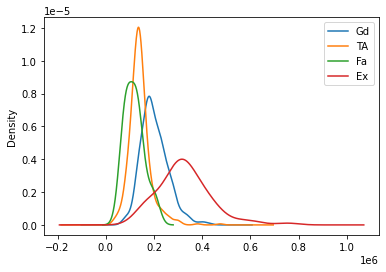

In [35]:
automate_plot(X_train, 'BsmtQual', 'SalePrice')

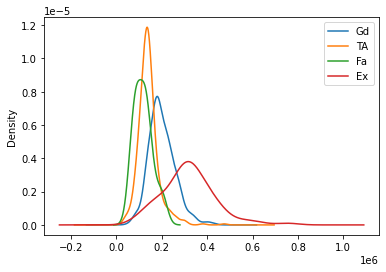

In [36]:
automate_plot(X_train, 'BsmtQual_imputed', 'SalePrice')

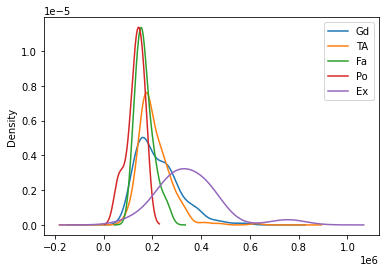

In [37]:
automate_plot(X_train, 'FireplaceQu', 'SalePrice')

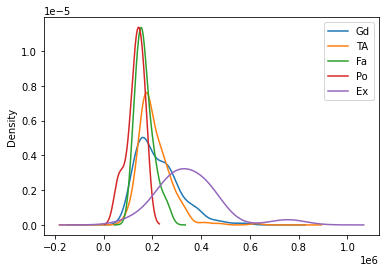

In [38]:
automate_plot(X_train, 'FireplaceQu_imputed', 'SalePrice')

Para BsmtQual, donde los NA son pocos, la distribución del target es preservada paralas categorías en la variable original y la imputada. Sin embargo, para FireplaceQu, que tiene más NAs, la distribución del target por cada categoría se afecta un poco.

## Nota: código sustitución por muestras aleatorias

El código en este notebook para las muestras aleatorias, es un poco complejo. Pero no te preocupes! Puedes hacer sustitución por muestras aleatorias usando el paquete de Feature-engine en solo un par de líneas de código. Te mostraremos como en otro notebook!